# Proyek Analisis Data: Bike Sharing Dataset

- Nama: Zadan Fairuz Mahitala
- Email: m314b4ky4587@bangkit.academy
- ID Dicoding: zadanfai

## Menentukan Pertanyaan Bisnis

- Apakah terdapat korelasi antara kondisi cuaca dengan lonjakan penyewaan sepeda casual yang teramati dalam data outlier?
- Bagaimana kondisi cuaca dapat memengaruhi peningkatan penyewaan sepeda, baik untuk pengguna casual maupun registered?

## Import Semua Packages/Library yang Digunakan

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [293]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')

We need to read the dataset file and assigned it into each variables

In [294]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [295]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [296]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

With using head() function we can see the top 4 data so we can see the bigger picture of two dataset, and so using .columns make it clearer to see the table columnd. Since both table have same columns i just check it once

Next, im going to create the "Data Dictionary" to easily track the feature definition without looking back or called the dataframe over and over

#### Data Dictionary:
- **instant** = record index
- **dteday**  = date
- **season** = season (**1**: springer, **2**: summer, **3**: fall, **4**: winter)
- **yr** = year (**0** :2011, **1** :2012)
- **mnth** = month (0 to 12)
- **hr** = hour (0 to 23)
- **holiday** = whether day is holiday or not
- **weekday** = day of the week
- **workingday** = if day is neither weekend nor holiday is **"1"**, otherwise is **"0"**
- **weathersit** =
    - **1** : Clear, Few clouds, Partly cloud, Partly Cloudy
    - **2** : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - **3** : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - **4** : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** = Normalized temperature in Celcius. The values are divided to 41 (max)
- **atemp** = Normalized feeling temperature in Celcius. The values are divided to 50 (max)
- **hum** = Normalized humidity. The values are divided to 100 (max)
- **windspeed** = Normalized wind speed. The values are divided to 67 (max)
- **casual** = count of casual users
- **registered** = count of registered users
- **cnt** = count of total rental bikes including both casual and registered

In [297]:
day_df2 = day_df.copy()
hour_df2 = hour_df.copy()

Before working on the dataset, i maked a copy both of them so in case there is any mistaken move i could easily back to the original dataset

### Assesing Data

Next thing to do is assesing each data of two tables, here is the steps overview

**Steps to do:**
1. Treating missing values (state the reasoning)
2. unique values (remove irrelevant values)
3. Treating outliers if there's any
4. Check duplicates, retain only the first record
5. Check data & convert data types
6. Check typos
7. Check time series data
8. Check logical errors if there's any

In [298]:
day_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In the day_df table i realize that "dteday" data type should be date instead of object 

In [299]:
hour_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


as well as the dteday data type in the hour_df table need to be converted

next thing to check, is there any **missing value** in those tables

##### Checking Missing Values

In [300]:
day_df2.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [301]:
hour_df2.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

After the check using **isna()** and **sum()** functions, it seems like both tables **dont have any missing values** in it

The third step is we need to check if there is any duplicate data in both tables

#### Checking Duplicate data

In [302]:
day_df2.duplicated(keep=False).sum()

np.int64(0)

In [303]:
hour_df2.duplicated(keep=False).sum()

np.int64(0)

i'm using dupliacted() function and passing "keep=False" arguments to ensure that all duplicates are marked as "True", also sum() function to sum up all the duplicated rows if there is any.

If we looking at the result we can see that **there is no duplicated data** in both tables.

#### Checking Outliers

Next thing is to check if there is outliers in the numeric features

In [304]:
def check_outliers(table_name, column_name):
    max_plot = np.max(table_name[column_name].unique())
    min_plot = np.min(table_name[column_name].unique())

    q1 = np.quantile(table_name[column_name], 0.25)
    q3 = np.quantile(table_name[column_name], 0.75)
    iqr = q3 - q1
    batas_bawah = q1 - (1.5 * iqr)
    batas_atas = q3 + (1.5 * iqr)

    print(f'Max: {max_plot} Min: {min_plot}\nQ1: {q1} \nQ3: {q3} \nIQR: {iqr}')
    print(f'Batas: {batas_bawah} - {batas_atas}')
    plt.boxplot(table_name[column_name])
    plt.ylabel("Distribusi Frekuensi Data")
    if iqr == 0:
        plt.ylim([-5,5])
    else:
        plt.ylim([batas_bawah-iqr, batas_atas+iqr])

    # Hitung sebaran data outliers

    fig, ax = plt.subplots(figsize=(7,5))
    ax.hist(table_name[column_name], 50)
    ax.title.set_text(f'Sebaran Data {column_name}')
    plt.show()

    banyak_outlier = (table_name[column_name] < batas_bawah).sum() + (table_name[column_name] > batas_atas).sum()
    total_data = table_name[column_name].value_counts().sum()
    print(f'Jumlah Outlier Kolom {column_name}: {banyak_outlier}/{total_data}')
    print('')

From the code above i write a function to check: 
- The **quantile 1(Q1)**, **quantile 3(Q3)**, and the **IQR**
- The second one i create the **"batas bawah"** and **"batas atas"** to make a boundary lines to detect if the data is outliers or not
- Make **the visualization of the outiers data point using boxplot** and **data distribution using histogram**
- After all that i **show how much the outliers also the total data** so we can decide the next move based on the outliers percentile

Since i need to check both tables, making the tables & column names as parameter should be efficient

In [305]:
kolom_int = day_df2.dtypes[(day_df2.dtypes == 'int64') | (day_df2.dtypes == 'float64')]
pd.DataFrame(kolom_int)

,0
instant,int64
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64
atemp,float64


I'm creating a new dataframe after filtering to select only 'int64' or 'float64' data types so we can easily check which column to passing into the check_outliers parameters

##### Checking day_df2 Outliers

Max: 4 Min: 1
Q1: 2.0 
Q3: 3.0 
IQR: 1.0
Batas: 0.5 - 4.5


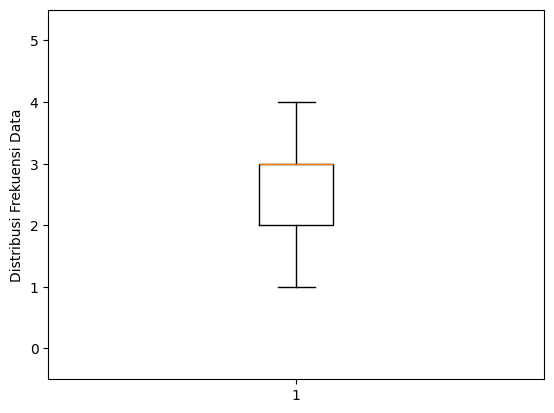

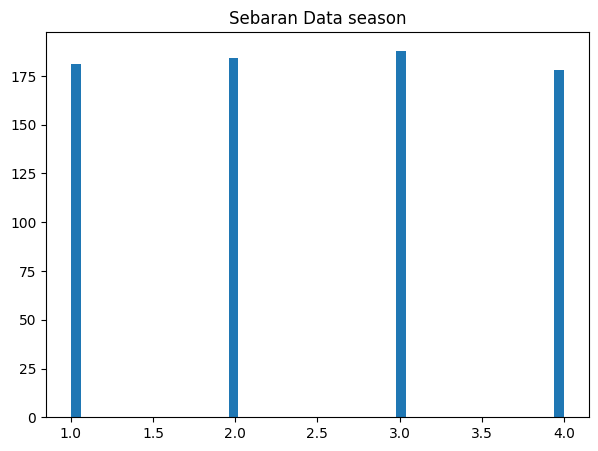

Jumlah Outlier Kolom season: 0/731



In [306]:
check_outliers(day_df2, 'season')

Max: 1 Min: 0
Q1: 0.0 
Q3: 1.0 
IQR: 1.0
Batas: -1.5 - 2.5


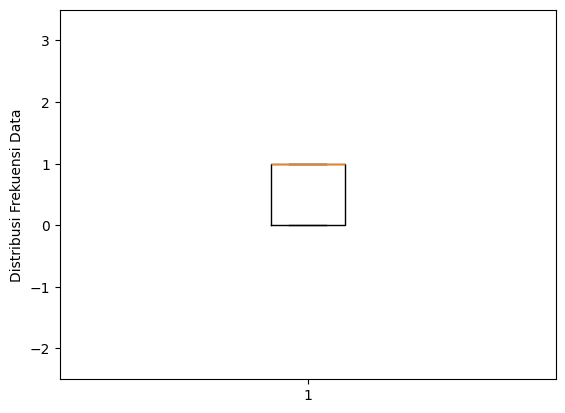

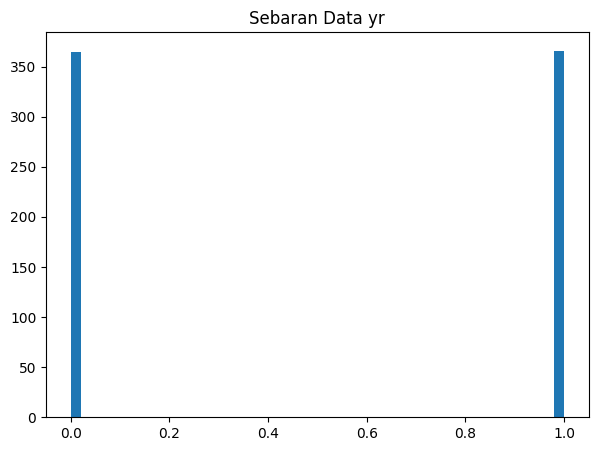

Jumlah Outlier Kolom yr: 0/731



In [307]:
check_outliers(day_df2, 'yr')

Max: 12 Min: 1
Q1: 4.0 
Q3: 10.0 
IQR: 6.0
Batas: -5.0 - 19.0


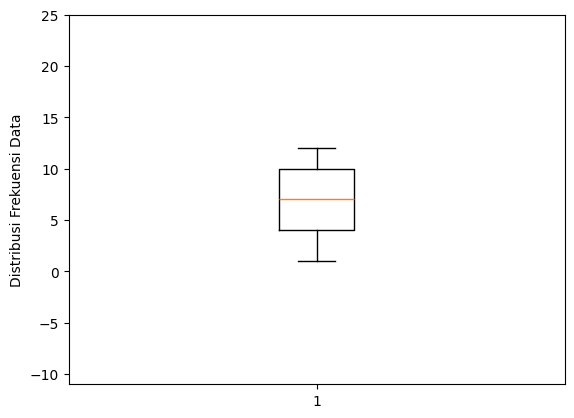

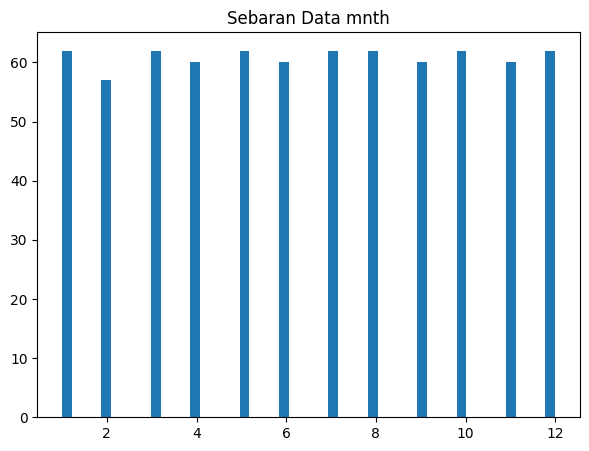

Jumlah Outlier Kolom mnth: 0/731



In [308]:
check_outliers(day_df2, 'mnth')

Max: 1 Min: 0
Q1: 0.0 
Q3: 0.0 
IQR: 0.0
Batas: 0.0 - 0.0


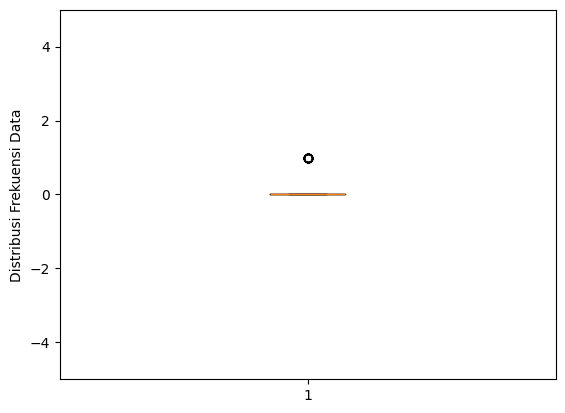

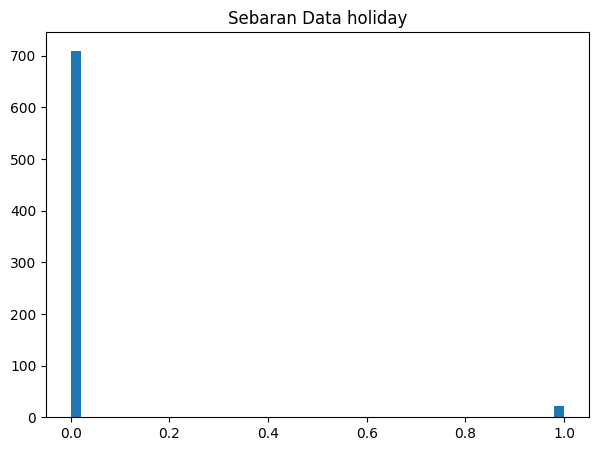

Jumlah Outlier Kolom holiday: 21/731



In [309]:
check_outliers(day_df2, 'holiday')

**Note that holiday column have 21 out of 731 outliers**

Max: 6 Min: 0
Q1: 1.0 
Q3: 5.0 
IQR: 4.0
Batas: -5.0 - 11.0


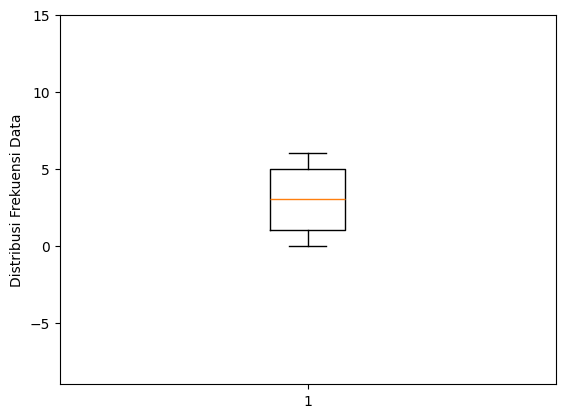

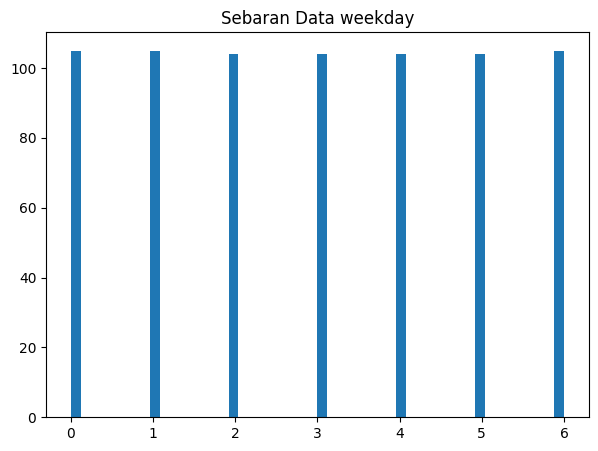

Jumlah Outlier Kolom weekday: 0/731



In [310]:
check_outliers(day_df2, 'weekday')

Max: 1 Min: 0
Q1: 0.0 
Q3: 1.0 
IQR: 1.0
Batas: -1.5 - 2.5


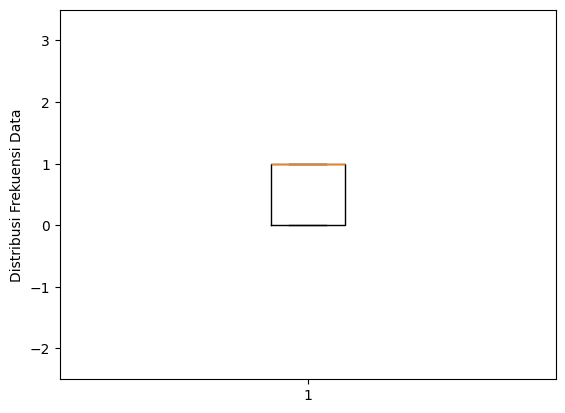

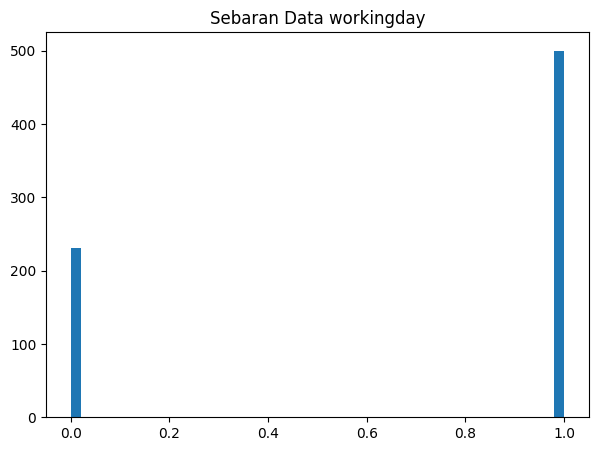

Jumlah Outlier Kolom workingday: 0/731



In [311]:
check_outliers(day_df2, 'workingday')

Max: 3 Min: 1
Q1: 1.0 
Q3: 2.0 
IQR: 1.0
Batas: -0.5 - 3.5


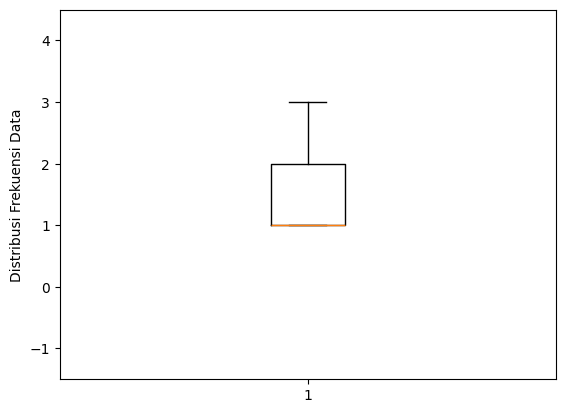

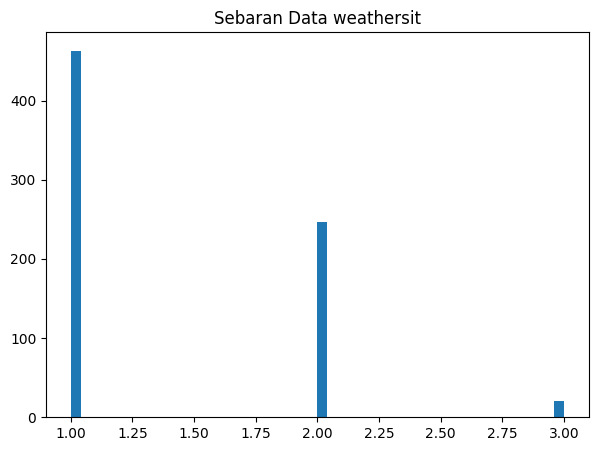

Jumlah Outlier Kolom weathersit: 0/731



In [312]:
check_outliers(day_df2, 'weathersit')

Max: 0.861667 Min: 0.0591304
Q1: 0.3370835 
Q3: 0.6554165000000001 
IQR: 0.3183330000000001
Batas: -0.14041600000000015 - 1.1329160000000003


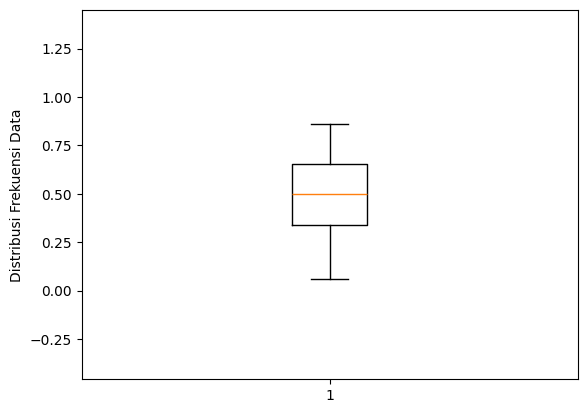

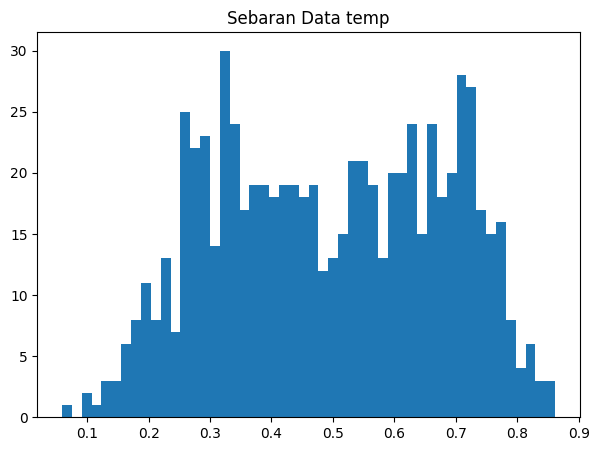

Jumlah Outlier Kolom temp: 0/731



In [313]:
check_outliers(day_df2, 'temp')

Max: 0.840896 Min: 0.0790696
Q1: 0.3378425 
Q3: 0.6086020000000001 
IQR: 0.2707595000000001
Batas: -0.06829675000000018 - 1.0147412500000002


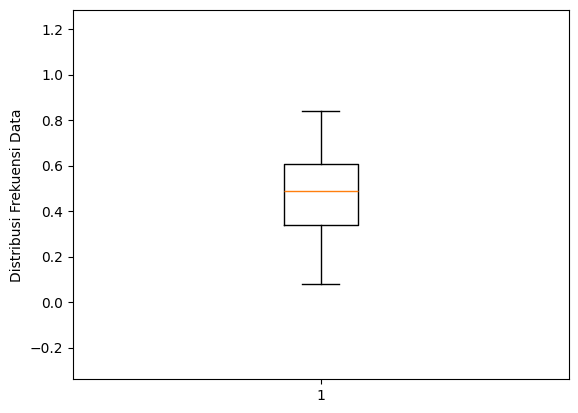

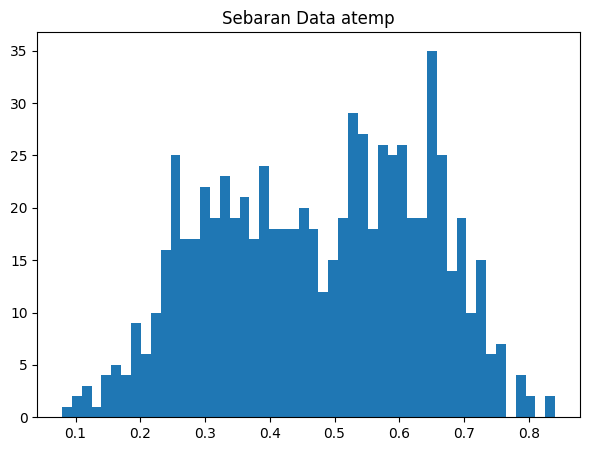

Jumlah Outlier Kolom atemp: 0/731



In [314]:
check_outliers(day_df2, 'atemp')

Max: 0.9725 Min: 0.0
Q1: 0.52 
Q3: 0.7302085 
IQR: 0.21020850000000002
Batas: 0.20468725 - 1.0455212500000002


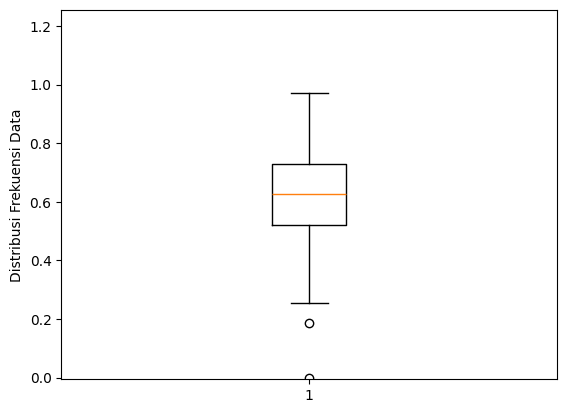

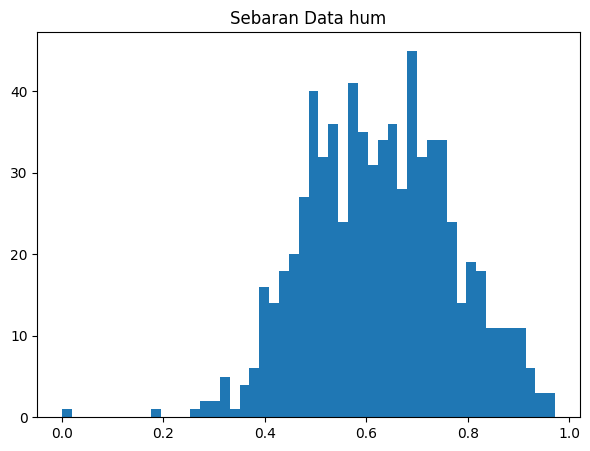

Jumlah Outlier Kolom hum: 2/731



In [315]:
check_outliers(day_df2, 'hum')

**In "hum" column we got another 2 out of 731 outliers data**

Max: 0.507463 Min: 0.0223917
Q1: 0.13495 
Q3: 0.2332145 
IQR: 0.0982645
Batas: -0.012446750000000034 - 0.38061125


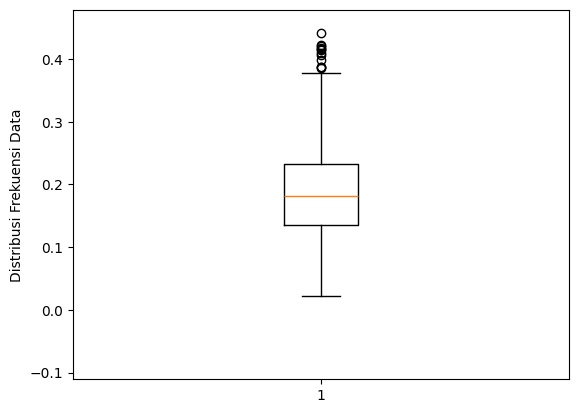

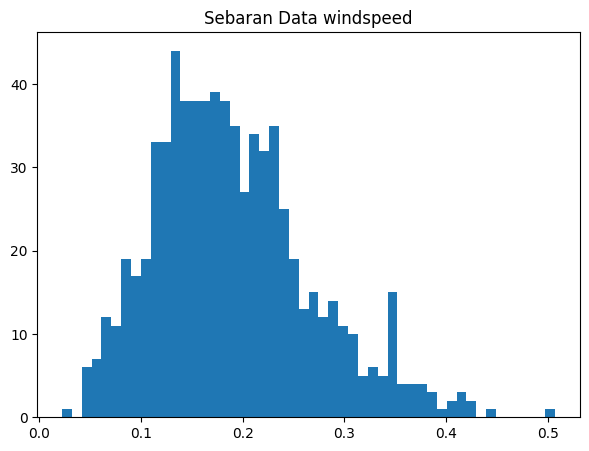

Jumlah Outlier Kolom windspeed: 13/731



In [316]:
check_outliers(day_df2, 'windspeed')

**In "Windspeed" column we got 13 out of 731 outliers**

Max: 3410 Min: 2
Q1: 315.5 
Q3: 1096.0 
IQR: 780.5
Batas: -855.25 - 2266.75


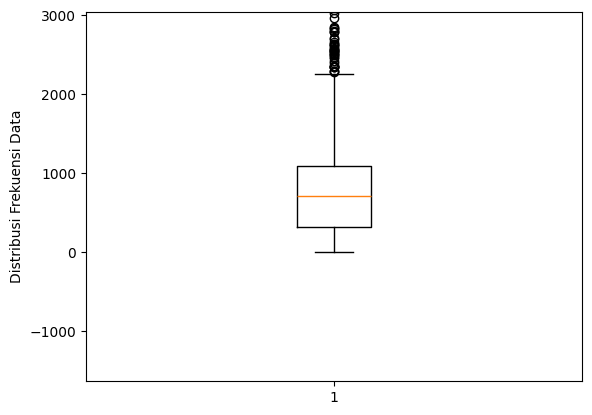

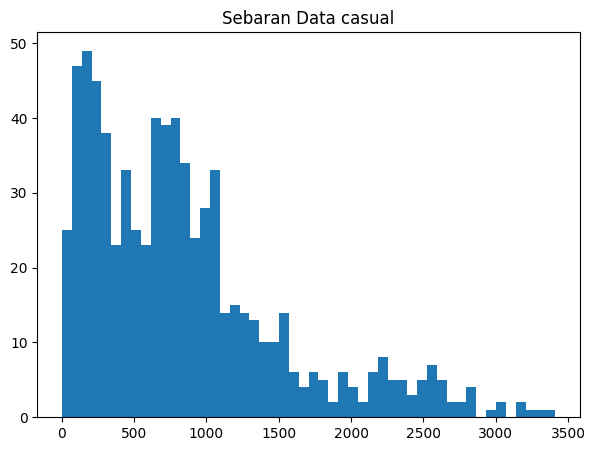

Jumlah Outlier Kolom casual: 44/731



In [317]:
check_outliers(day_df2, 'casual')

**In "Casual" column we got 44 out of 731 which is pretty much**

Max: 6946 Min: 20
Q1: 2497.0 
Q3: 4776.5 
IQR: 2279.5
Batas: -922.25 - 8195.75


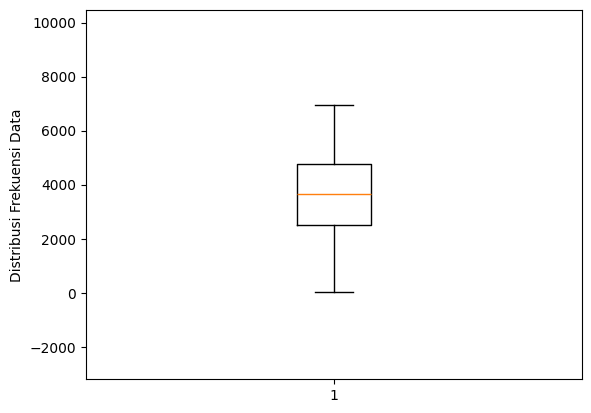

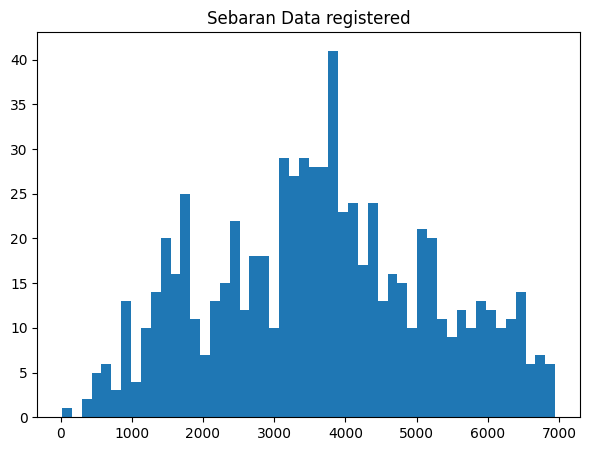

Jumlah Outlier Kolom registered: 0/731



In [318]:
check_outliers(day_df2, 'registered')

Max: 8714 Min: 22
Q1: 3152.0 
Q3: 5956.0 
IQR: 2804.0
Batas: -1054.0 - 10162.0


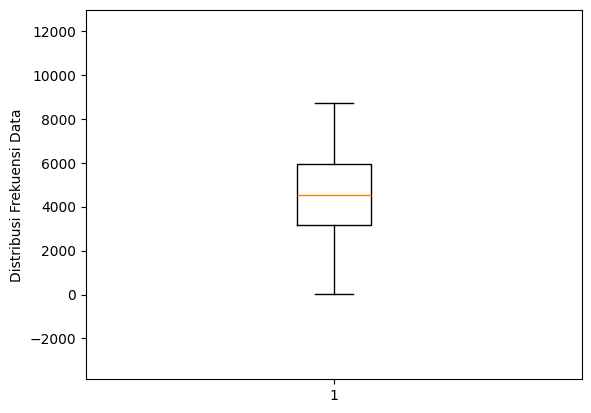

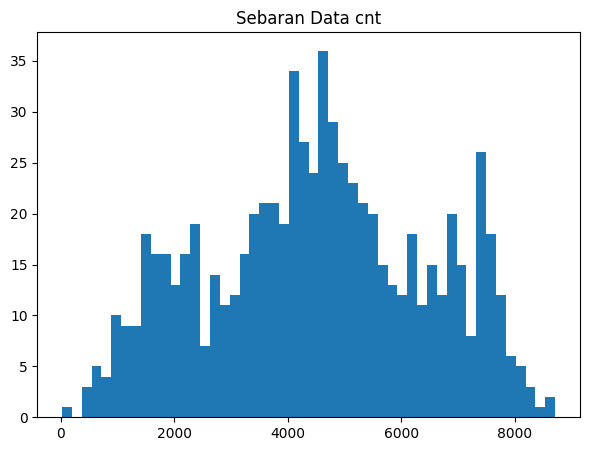

Jumlah Outlier Kolom cnt: 0/731



In [319]:
check_outliers(day_df2, 'cnt')

##### Checking hour_df2 outliers

Max: 4 Min: 1
Q1: 2.0 
Q3: 3.0 
IQR: 1.0
Batas: 0.5 - 4.5


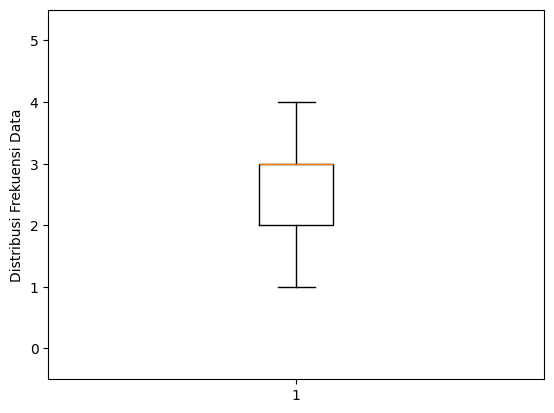

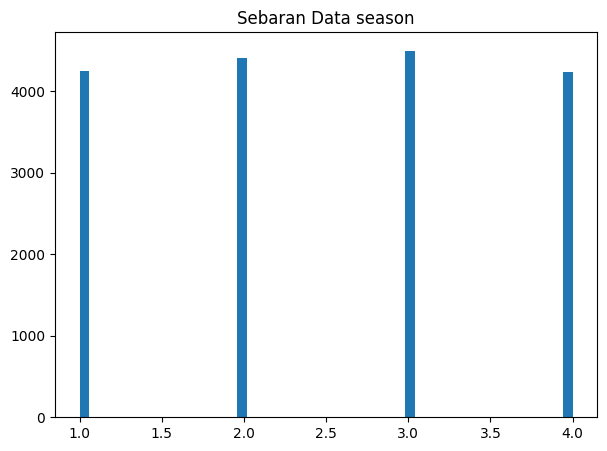

Jumlah Outlier Kolom season: 0/17379



In [320]:
check_outliers(hour_df2, 'season')

Max: 1 Min: 0
Q1: 0.0 
Q3: 1.0 
IQR: 1.0
Batas: -1.5 - 2.5


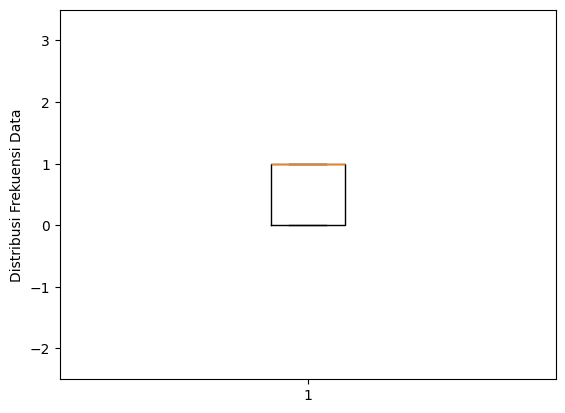

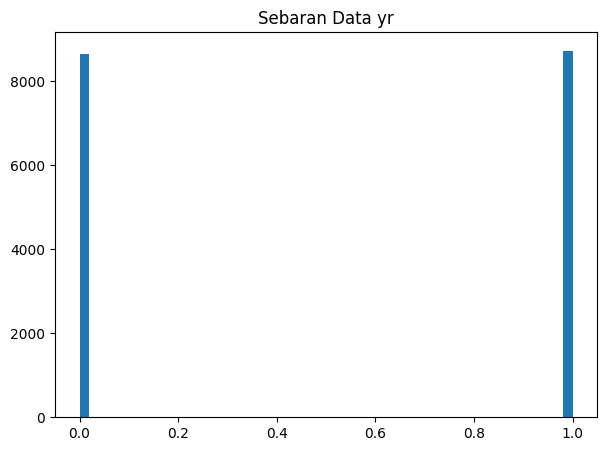

Jumlah Outlier Kolom yr: 0/17379



In [321]:
check_outliers(hour_df2, 'yr')

Max: 12 Min: 1
Q1: 4.0 
Q3: 10.0 
IQR: 6.0
Batas: -5.0 - 19.0


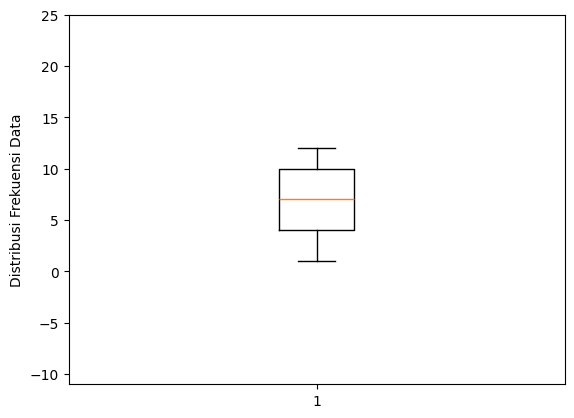

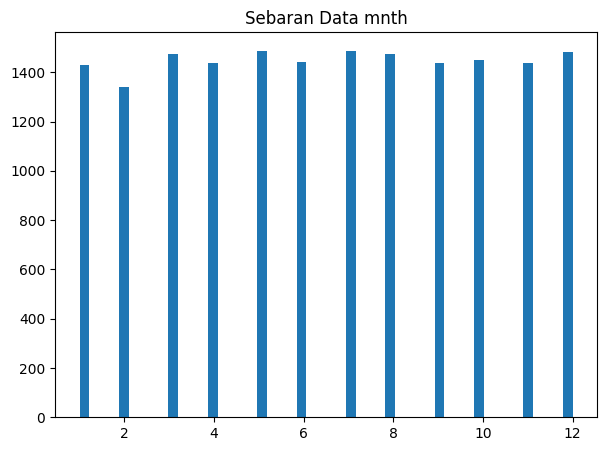

Jumlah Outlier Kolom mnth: 0/17379



In [322]:
check_outliers(hour_df2, 'mnth')

Max: 1 Min: 0
Q1: 0.0 
Q3: 0.0 
IQR: 0.0
Batas: 0.0 - 0.0


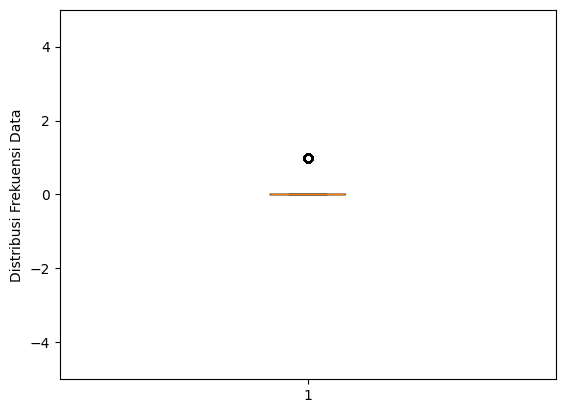

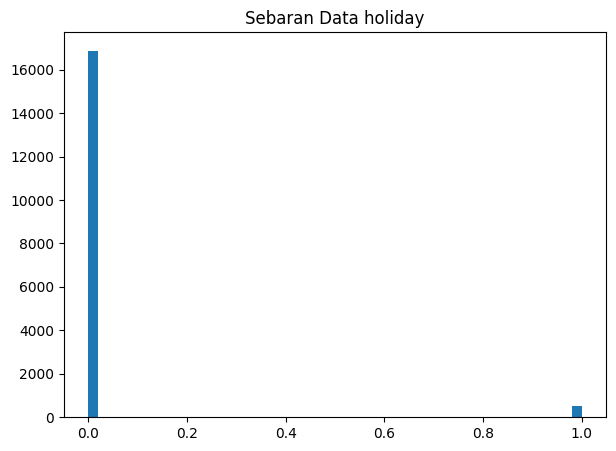

Jumlah Outlier Kolom holiday: 500/17379



In [323]:
check_outliers(hour_df2, 'holiday')

**In the "holiday" column we got 500 out of 17379 data outliers**

Max: 6 Min: 0
Q1: 1.0 
Q3: 5.0 
IQR: 4.0
Batas: -5.0 - 11.0


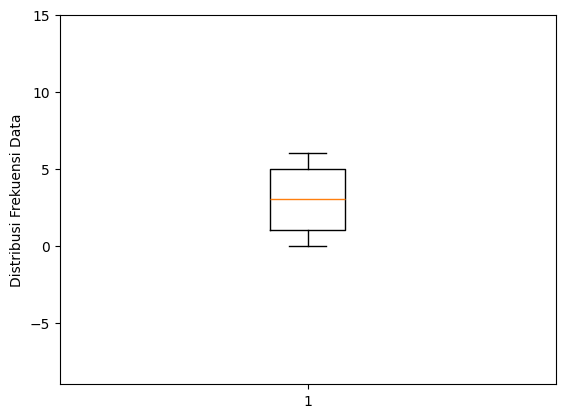

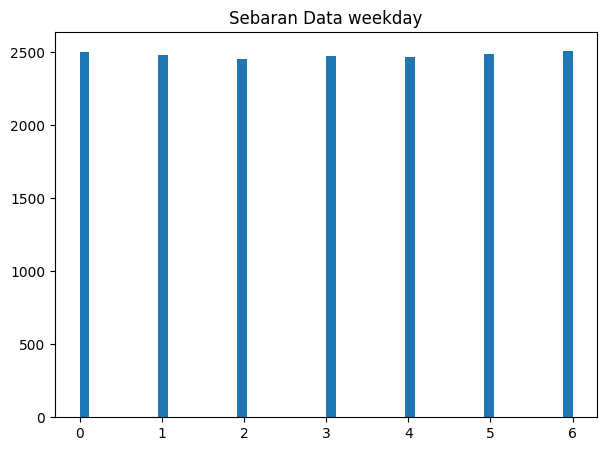

Jumlah Outlier Kolom weekday: 0/17379



In [324]:
check_outliers(hour_df2, 'weekday')

Max: 1 Min: 0
Q1: 0.0 
Q3: 1.0 
IQR: 1.0
Batas: -1.5 - 2.5


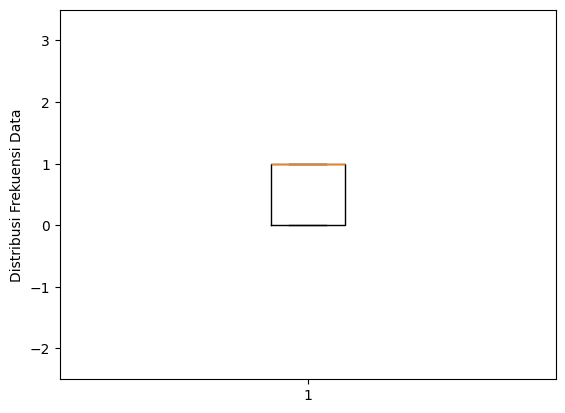

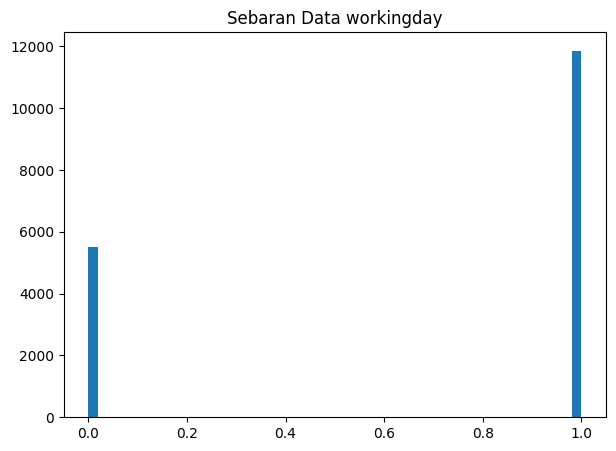

Jumlah Outlier Kolom workingday: 0/17379



In [325]:
check_outliers(hour_df2, 'workingday')

Max: 3 Min: 1
Q1: 1.0 
Q3: 2.0 
IQR: 1.0
Batas: -0.5 - 3.5


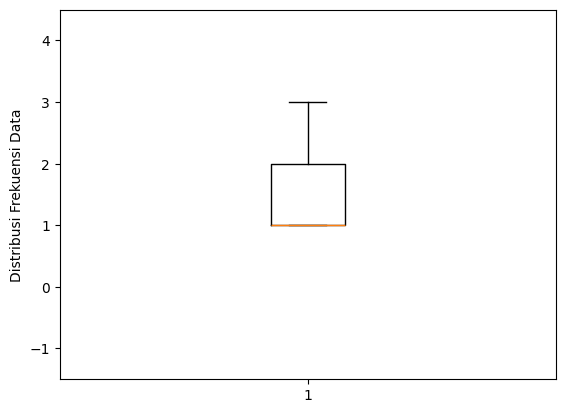

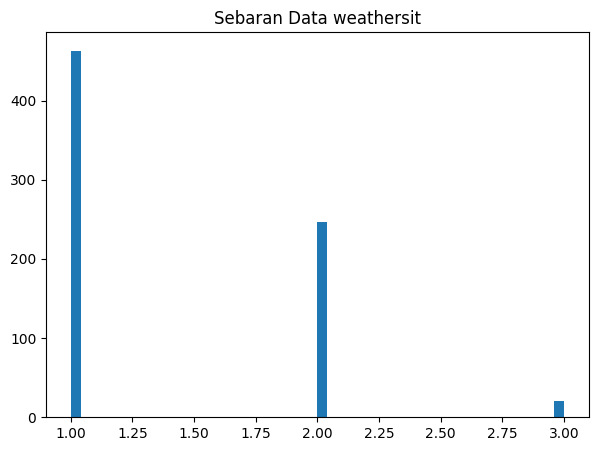

Jumlah Outlier Kolom weathersit: 0/731



In [326]:
check_outliers(day_df2, 'weathersit')

Max: 1.0 Min: 0.02
Q1: 0.34 
Q3: 0.66 
IQR: 0.32
Batas: -0.13999999999999996 - 1.1400000000000001


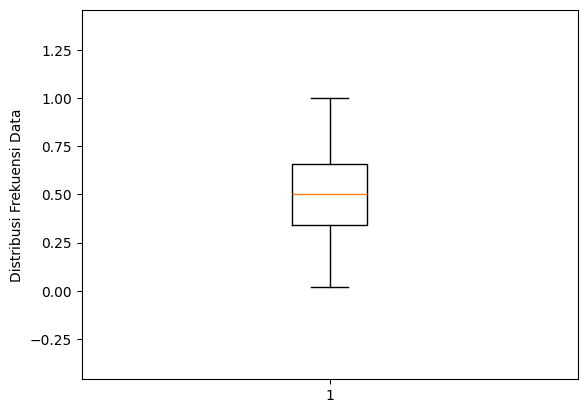

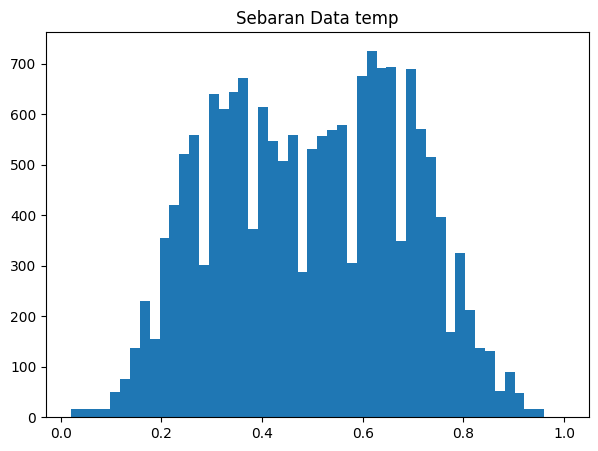

Jumlah Outlier Kolom temp: 0/17379



In [327]:
check_outliers(hour_df2, 'temp')

Max: 1.0 Min: 0.0
Q1: 0.3333 
Q3: 0.6212 
IQR: 0.2879
Batas: -0.09854999999999997 - 1.0530499999999998


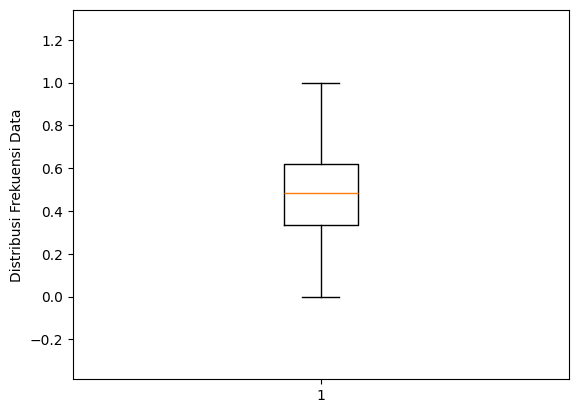

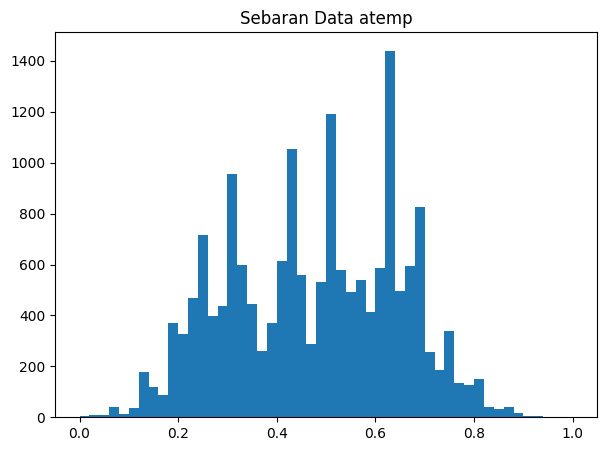

Jumlah Outlier Kolom atemp: 0/17379



In [328]:
check_outliers(hour_df2, 'atemp')

Max: 1.0 Min: 0.0
Q1: 0.48 
Q3: 0.78 
IQR: 0.30000000000000004
Batas: 0.029999999999999916 - 1.23


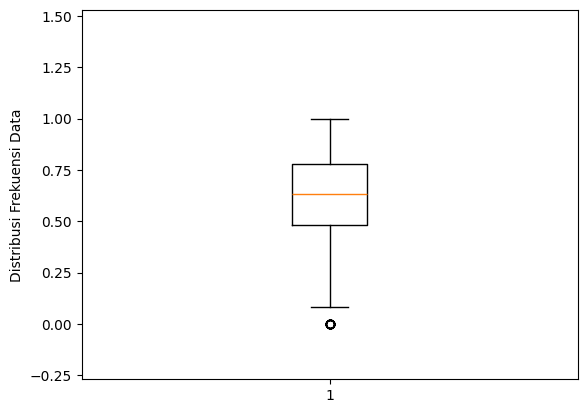

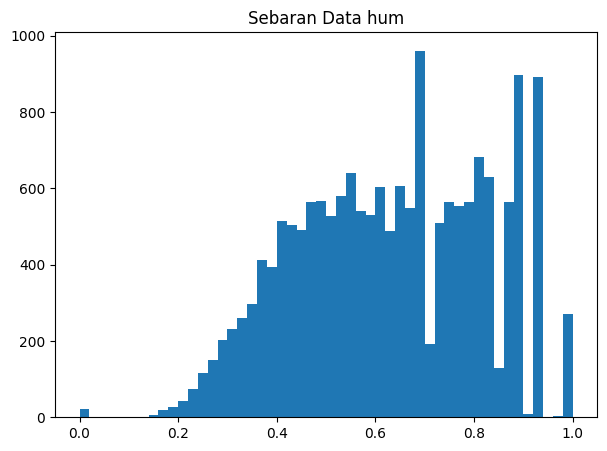

Jumlah Outlier Kolom hum: 22/17379



In [329]:
check_outliers(hour_df2, 'hum')

**We got 22 outliers out of 17379 data in the "Hum" column**

Max: 0.8507 Min: 0.0
Q1: 0.1045 
Q3: 0.2537 
IQR: 0.1492
Batas: -0.1193 - 0.4775


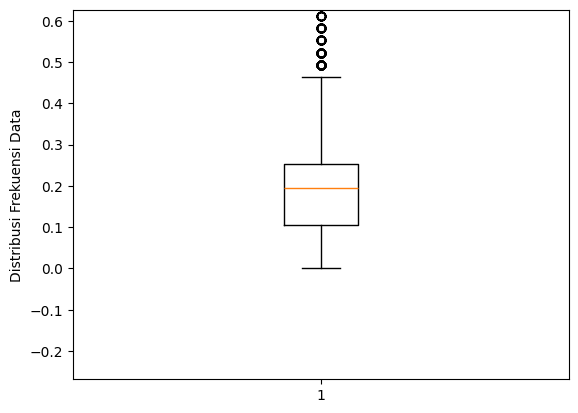

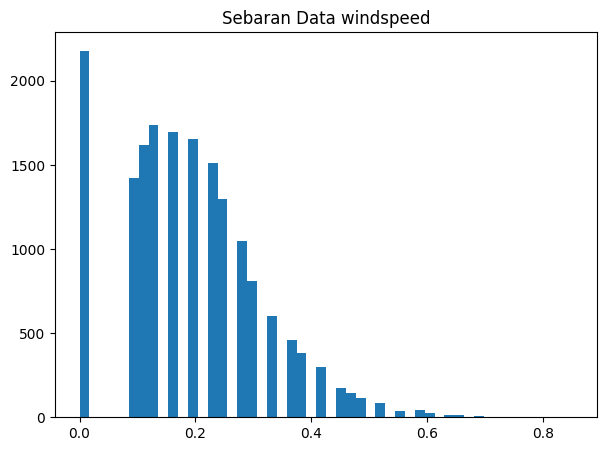

Jumlah Outlier Kolom windspeed: 342/17379



In [330]:
check_outliers(hour_df2, 'windspeed')

**We got 342 out of 17379 outliers in the "Windspeed" column**

Max: 367 Min: 0
Q1: 4.0 
Q3: 48.0 
IQR: 44.0
Batas: -62.0 - 114.0


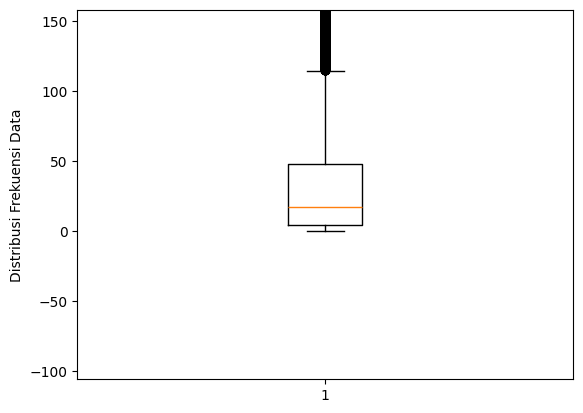

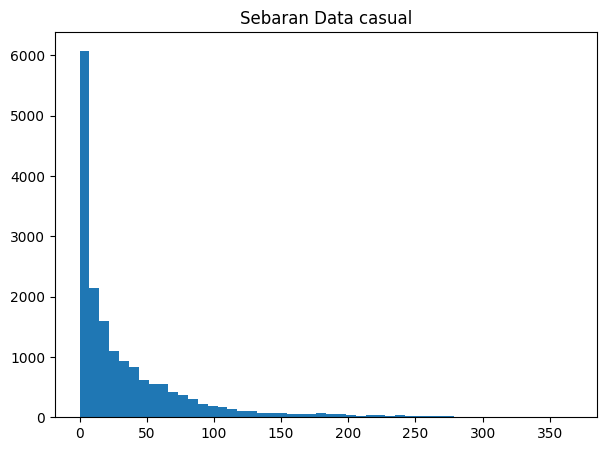

Jumlah Outlier Kolom casual: 1192/17379



In [331]:
check_outliers(hour_df2, 'casual')

**We got 1192 out of 17379 outliers in the "Casual" column**

Max: 886 Min: 0
Q1: 34.0 
Q3: 220.0 
IQR: 186.0
Batas: -245.0 - 499.0


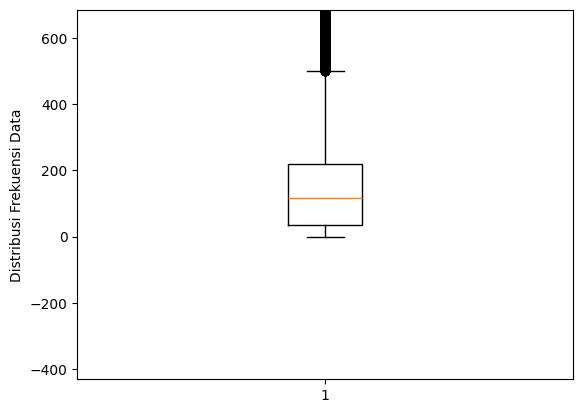

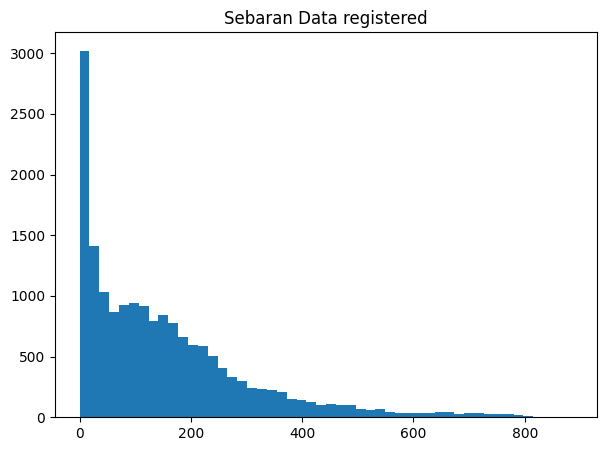

Jumlah Outlier Kolom registered: 680/17379



In [332]:
check_outliers(hour_df2, 'registered')

**In column "registered" we got 680 outliers out of 17379 data**

Max: 977 Min: 1
Q1: 40.0 
Q3: 281.0 
IQR: 241.0
Batas: -321.5 - 642.5


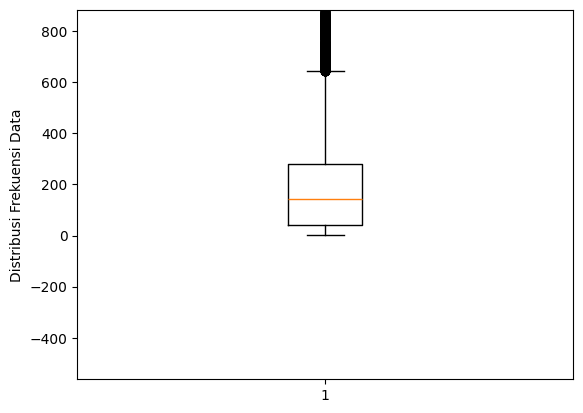

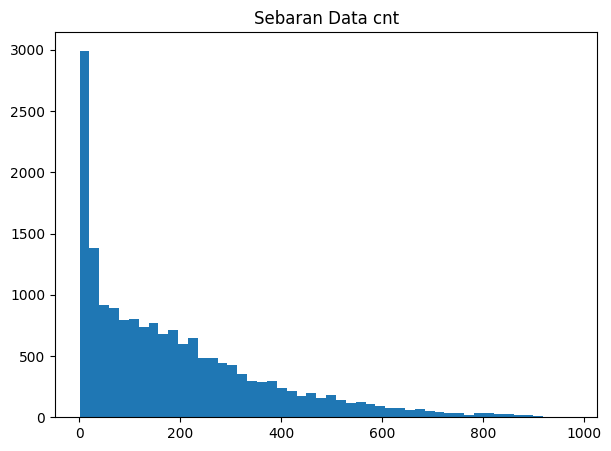

Jumlah Outlier Kolom cnt: 505/17379



In [333]:
check_outliers(hour_df2, 'cnt')

**And the last one "cnt", we got 505 outliers out of 17379 data**

##### Data Wrangling Conclusion

From the checking process above, we got:
1. **day_df2**:
    - **casual** = 44 outliers
    - **windspeed** = 13 outliers
    - **hum** = 2 outliers
    - **holiday** = 21
   
Total data day_df2: 731

2. **hour_df2**:
    - **hum** = 22 outliers
    - **windspeed** = 342 outliers
    - **casual** = 1192 outliers
    - **registered** = 680 outliers
    - **holiday** = 500 outliers

Total data hour_df2: 17379

From the outliers data we can conclude that:
1. The small number of **windspeed and hum** outliers in **day_df2** might indicate that wind speed and humidity values are generally consistent. But **in the hour_df2** which outliers value in **windspeed** got has value could indicate extreme weather.

2. The 1192 **casual** outliers in **hour_df2** is a significant number of outliers, shows that many casual bike rentals at certain hours deviate greatly from the average. This may due to factors such as weather, seasons, special events, promotions etc. that need to be analyzed further.

Also, **we need to convert the "dteday" data type into date**

In [334]:
# Changing dteday dtype to date

day_df2['dteday'] = pd.to_datetime(day_df2['dteday'], format='%Y-%m-%d')
day_df2['dteday'].head(7)

0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
5   2011-01-06
6   2011-01-07
Name: dteday, dtype: datetime64[ns]

In [335]:
# Changing dteday dtype to date

hour_df2['dteday'] = pd.to_datetime(hour_df2['dteday'], format='%Y-%m-%d')
hour_df2['dteday'].head(7)

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
5   2011-01-01
6   2011-01-01
Name: dteday, dtype: datetime64[ns]

In [336]:
day_df2['month'] = day_df2['dteday'].dt.month
day_df2['year'] = day_df2['dteday'].dt.year

In [337]:
hour_df2['month'] = day_df2['dteday'].dt.month
hour_df2['year'] = day_df2['dteday'].dt.year

From the 4 code above i change the dtype of "dteday" column using pd.to_datetime() module and using specific format '%Y-%m-%d' which mean "Years-Month-Day'. Also adding two new columns that represent months and years

In [338]:
season_mapping = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
day_df2['season'] = day_df2['season'].replace(season_mapping)

In [339]:
hour_df2['season'] = hour_df2['season'].replace(season_mapping)

From code above im changing the season column value from just number into the season name like springer, summer, and so on.

In [340]:
holiday_counts_by_year = hour_df2.groupby(['yr', 'holiday'])['dteday'].nunique().unstack(fill_value=0)
print(holiday_counts_by_year)

holiday    0   1
yr              
0        355  10
1        355  11


Because of suspicious value of 'holiday' outliers value, i'm checked how much holiday in a year so there's no logical errors. And from the result above we can see that the holiday values are 11/355 which is true. 

**From here we can ignore the holiday outliers**

## Exploratory Data Analysis

Before we analyze the data, first of all we need to explore the table that contains a lot of information

In [341]:
day_df2.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,6.519836,2011.500684
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000,2011.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,4.000000,2011.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,7.000000,2012.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,10.000000,2012.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,12.000000,2012.000000


Based on the summary of statistical parameters above, we got information that the maximum total bike rental is 8714, and average weathersit is 1 which when weather are Clear, Few clouds, Partly cloud, Partly Cloudy.

Now we'll looking at the correlation between those two, we'll look at maximum total bike rental demographic by weather. To do this we'll use groupby() and agg() method.

### Bagaimana kondisi cuaca dapat memengaruhi peningkatan penyewaan sepeda, baik untuk pengguna casual maupun registered?

In [342]:
day_df2.groupby(by='weathersit').agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

Based on the pivot table above, we can see that our customers are prefer to rent during **(Clear, Few clouds, Partly cloud, Partly Cloudy weather)** followed by **(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)** in second place. On the other hand **(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather)** has no enthusiasts to rent bicycles.

based on **the number of renters and the maximum total** bike rent shows that in the weather **(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)** repetition of borrowing repeatedly so that cmt reaches 65% of when the weather (Clear, Few clouds, Partly cloud, Partly Cloudy weather).

In [343]:
day_df2.groupby(['year', 'month', 'weathersit']).agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
                      nunique   max   min         mean          std
year month weathersit                                              
2011 1     1               17  1606   431  1235.529412   313.999028
           2               13  1985   683  1283.000000   410.543948
           3                1   506   506   506.000000          NaN
     2     1               19  2927  1450  1852.105263   390.089006
           2                9  1807  1005  1447.222222   261.642780
     3     1               17  3239  1685  2335.470588   431.394268
           2               12  2192   605  1836.166667   429.983474
           3                2  1685   623  1154.000000   750.947402
     4     1               14  5312  2808  3742.285714   709.736401
           2               15  4191  1471  2778.866667   942.094313
           3                1   795   795   795.000000          NaN
     5     1               19  5805  3958  4610.473684   426.223385
           2               12  4575  2633  4018.500000   603.024121
     6     1               21  5515  4401  4945.857143   324.715920
           2                9  4906  3767  4405.444444   471.670465
     7     1               27  5923  3285  4549.074074   644.285706
           2                4  6043  3784  4629.000000  1010.072935
     8     1               23  5895  3785  4672.478261   488.929803
           2                8  4576  1115  3653.000000  1085.469879
     9     1               11  5345  4274  4864.181818   313.029334
           2               16  5423  2395  4210.250000   758.143390
           3                3  2710  1842  2182.666667   463.129931
     10    1               18  5511  3331  4608.833333   574.647948
           2               10  4748  2429  3508.500000   779.333512
           3                3  2424   627  1822.333333  1035.196761
     11    1               20  4486  1495  3637.550000   666.220564
           2                7  4195  2566  3318.142857   617.398690
           3                3  2765  1607  2063.000000   616.950565
     12    1               20  3940   754  2790.400000   921.552032
           2                9  3811  1162  3135.111111   866.438464
           3                2  2594   705  1649.500000  1335.724710
2012 1     1               20  4521  1951  3319.350000   825.545069
           2               11  4097  1301  2759.727273   876.618856
     2     1               18  5062  1529  3881.000000   828.286395
           2               10  3922  1834  3111.000000   646.380005
           3                1  2169  2169  2169.000000          NaN
     3     1               19  6871  3333  5278.210526   996.935280
           2               12  8362  3194  5382.416667  1623.479342
     4     1               23  7460  4862  6293.782609   651.994838
           2                6  6041  3214  4740.000000  1020.277021
           3                1  1027  1027  1027.000000          NaN
     5     1               18  8294  5743  6846.611111   662.070028
           2               13  6883  2843  5586.615385  1134.797819
     6     1               25  8120  5463  6998.680000   707.833650
           2                5  7001  4127  5572.600000  1215.139622
     7     1               24  8173  4672  6605.875000   828.222419
           2                6  7499  5870  6767.833333   642.092646
           3                1  4459  4459  4459.000000          NaN
     8     1               20  7865  5464  7172.700000   545.603490
           2               11  7582  4549  6459.000000   982.091849
     9     1               22  8714  6034  7667.909091   605.093453
           2                8  7415  4073  6234.875000  1073.533476
     10    1               14  8156  6639  7467.000000   451.999319
           2               15  7852  1096  5976.133333  1852.727945
           3                2  4639    22  2330.500000  3264.712009
     11    1               22  6852  2277  5085.181818  1260.072811
          

Based on the pivot table above, **the peak rental of bicycle occurs in the 8th, 9th, and 10th months**, which is **the summer & fall season**. And **the spike in bike rentals always starts in the 5th month of 2011 and the 3rd month of 2012**, which is **early spring to late spring**. 

### Apakah terdapat korelasi antara kondisi cuaca dengan lonjakan penyewaan sepeda casual yang teramati dalam data outlier?

In [344]:
hour_df2.groupby(by='weathersit').agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
})

instant casual                          
           nunique    max min       mean        std
weathersit                                         
1            11413    367   0  40.545431  53.126559
2             4544    350   0  29.595290  41.356704
3             1419    263   0  16.055673  30.017327
4                3      6   1   2.666667   2.886751

Likewise, **the highest casual bike rentals** occurred in the weather **(Clear, Few clouds, Partly cloud, Partly Cloudy weather)**.

In [345]:
hour_df2.groupby(['year', 'month', 'weathersit']).agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
})

instant casual                          
                        nunique    max min       mean        std
year   month weathersit                                         
2011.0 1.0   1               12     29   0   8.166667   9.712535
             2               16     47   0  14.250000  16.719250
             3                3      9   0   5.000000   4.582576
       2.0   1               18     13   0   4.166667   4.780475
             2                6     20   1  10.833333   6.675827
             3                4     19   0   8.000000   8.205689
       3.0   1               30     18   0   5.633333   5.780367
             2                1      5   5   5.000000        NaN
       4.0   1               28     12   0   3.035714   3.271449
             2                2      0   0   0.000000   0.000000
       5.0   1               16     20   2   8.125000   5.162364
             2               14     19   0   4.428571   5.445030
             3                1      0   0   0.000000        NaN
       6.0   1               11     12   0   5.000000   3.405877
             2               15      9   0   3.600000   3.290679
             3                4      0   0   0.000000   0.000000
       7.0   1               31     13   0   1.935484   2.954494
       8.0   1               15      4   0   1.400000   1.404076
             2               16      5   0   2.125000   1.707825
       9.0   1               16      5   0   1.312500   1.621471
             2                8      6   0   2.875000   2.356602
             3                6      1   0   0.500000   0.547723
       10.0  1               29      5   0   1.241379   1.573331
             2                2      4   2   3.000000   1.414214
       11.0  1               24      9   0   2.458333   2.358687
             2                6      2   0   1.000000   0.894427
       12.0  1               20     35   0  13.700000  10.877790
             2               11     33   0  11.363636  12.018924
2012.0 1.0   1                6     23   4  10.833333   6.968979
             2               20     21   0   5.250000   5.683540
             3                5      4   0   2.000000   1.581139
       2.0   1                5     11   4   7.800000   2.774887
             2               21      5   0   1.142857   1.525966
             3                3      1   0   0.666667   0.577350
       3.0   1               17      6   0   2.294118   2.229482
             2               14     12   0   4.785714   3.490175
       4.0   1               21     11   0   3.523810   3.627934
             2                7      3   0   0.571429   1.133893
             3                2      0   0   0.000000   0.000000
       5.0   1               26     24   0   6.923077   6.764159
             2                5     10   0   3.400000   4.098780
       6.0   1               26      9   0   3.961538   2.675530
             2                4     11   2   5.500000   4.041452
       7.0   1                9     16   0   5.000000   6.062178
             2               17     21   0   8.647059   7.158397
             3                5      3   0   1.400000   1.516575
       8.0   1                8      4   0   1.875000   1.457738
             2                8      2   0   0.750000   0.886405
             3               14      7   0   2.285714   2.524604
             4                1      1   1   1.000000        NaN
       9.0   1               20     22   0   4.300000   6.375116
             2               10     12   1   5.300000   3.945462
       10.0  1               23     19   0   5.391304   6.118074
             2                8      7   1   3.250000   2.052873
       11.0  1                2      3   0   1.500000   2.121320
             2               22      6   0   1.863636   1.726418
             3                6      3   0   1.000000   1.549193
       12.0  1                7     10   1   5.428571   3.408672
             2               14      7   0   3.500000   1.6

Based on the pivot table above, **Casual bike rentals** in **(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)** weather in **March and October** in 2011 and 2012 always had no demand.

In [393]:
# Mengammbil data outliers
max_plot = np.max(hour_df2['casual'].unique())
min_plot = np.min(hour_df2['casual'].unique())

q1 = np.quantile(hour_df2['casual'], 0.25)
q3 = np.quantile(hour_df2['casual'], 0.75)
iqr = q3 - q1
batas_bawah = q1 - (1.5 * iqr)
batas_atas = q3 + (1.5 * iqr)

print(f'Max: {max_plot} Min: {min_plot}\nQ1: {q1} \nQ3: {q3} \nIQR: {iqr}')
print(f'Batas: {batas_bawah} - {batas_atas}')

banyak_outlier = (hour_df2['casual'] < batas_bawah).sum() + (hour_df2['casual'] > batas_atas).sum()
total_data = hour_df2['casual'].value_counts().sum()
print(f'Jumlah Outlier Kolom Casual : {banyak_outlier}/{total_data}')
print('')

hour_df3 = hour_df2.copy()
hour_df3['is_outlier'] = (hour_df3['casual'] < batas_bawah) | (hour_df3['casual'] > batas_atas)

outliers_df = hour_df3[hour_df3['is_outlier']]


Max: 367 Min: 0
Q1: 4.0 
Q3: 48.0 
IQR: 44.0
Batas: -62.0 - 114.0
Jumlah Outlier Kolom Casual : 1192/17379



On the code above, i takes a piece of code from the check_outliers() function to create a new outliers variable (outlier_df) so we can play with it.

In [401]:
outliers_df['casual'].value_counts().head(30)

casual
120    26
117    19
128    18
125    18
148    17
122    17
132    17
121    16
142    15
119    15
164    15
115    15
129    14
145    14
131    14
191    13
133    13
116    13
143    13
118    13
195    12
180    12
123    12
124    12
168    12
139    12
130    12
177    12
240    11
150    11
Name: count, dtype: int64

In [406]:
outliers_df['casual'].unique()

array([144, 149, 124, 126, 174, 168, 170, 175, 138, 120, 145, 172, 118,
       139, 166, 219, 240, 147, 148, 128, 121, 156, 135, 119, 167, 181,
       179, 161, 143, 182, 171, 180, 205, 197, 162, 142, 178, 185, 184,
       217, 191, 134, 150, 123, 132, 129, 196, 122, 195, 183, 206, 158,
       137, 173, 222, 187, 232, 204, 117, 164, 146, 125, 201, 130, 216,
       237, 221, 194, 214, 151, 141, 116, 153, 133, 115, 188, 193, 127,
       154, 169, 131, 176, 210, 159, 140, 157, 152, 136, 177, 215, 198,
       248, 225, 242, 235, 224, 236, 160, 234, 200, 155, 186, 245, 218,
       256, 251, 262, 189, 212, 272, 223, 208, 192, 165, 229, 199, 226,
       286, 352, 357, 367, 291, 233, 264, 213, 202, 263, 265, 275, 243,
       238, 190, 283, 295, 320, 355, 326, 321, 354, 299, 227, 254, 260,
       207, 274, 308, 288, 311, 253, 163, 298, 282, 266, 278, 267, 259,
       281, 279, 220, 241, 230, 293, 257, 269, 255, 228, 276, 332, 361,
       356, 331, 203, 258, 247, 244, 246, 209, 307, 261, 268, 30

From the code above, we can identify which data that count as an outliers. 

Next i'll make an aggregation dataframe so we can track the correlation between the outliers and the weathers.

In [413]:
outliers_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'month', 'year', 'is_outlier'],
      dtype='object')

In [416]:
outliers_df.groupby(by='weathersit').agg({
    "casual": 'count'
})

,casual
weathersit,
1,950
2,213
3,29


Based on the pivot table above, we can see that **the spike of casual bike renting which identify as outliers happen** when weathers are **(Clear, Few clouds, Partly cloud, Partly Cloudy weather)** followed by **(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)** in second place. On the other hand **(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather) has a few contribution of the casual bike rent at certain hours that deviate greatly**.

In [405]:
outliers_df.groupby(by='season').agg({
    "casual": 'count'
})

,casual
season,
fall,438
springer,62
summer,452
winter,240


Likewise, **the highest casual bike rentals that deviate greatly (spike)** occurred in the **Summer** season.

## Visualization & Explanatory Analysis

### Apakah terdapat korelasi antara kondisi cuaca dengan lonjakan penyewaan sepeda casual yang teramati dalam data outlier?

C:\Users\zadan\AppData\Local\Temp\ipykernel_12108\992653195.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_rentals, x='weathersit', y='mean', palette='viridis')


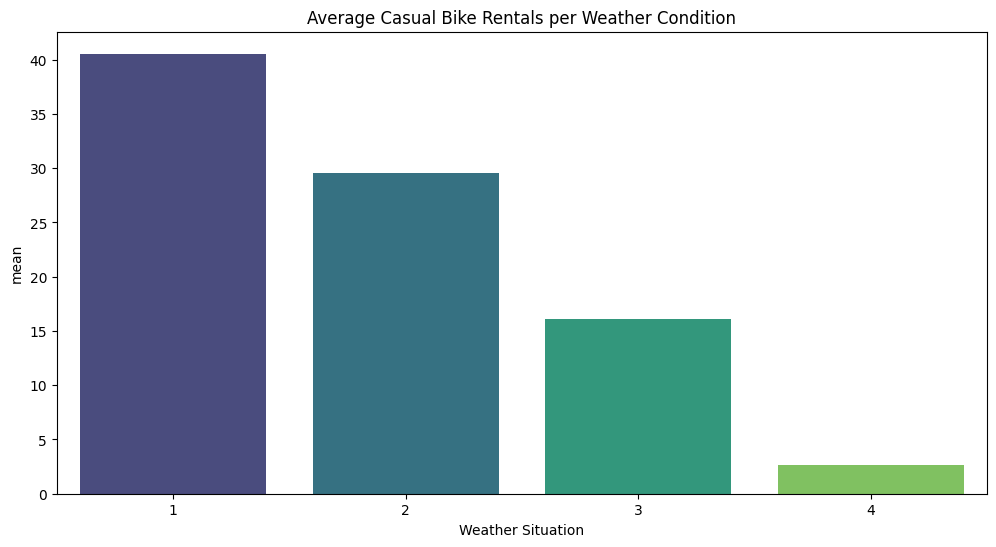

In [417]:
# Assuming your dataframe is 'hour_df2'

# First, group the data by 'weathersit' and calculate relevant statistics for casual rentals
weather_rentals = hour_df2.groupby('weathersit')['casual'].agg(['max', 'min', 'mean', 'std']).reset_index()

# Second, filter the data by months and years where we want to see the trends (March and October)
monthly_rentals = hour_df2[(hour_df2['month'].isin([3, 10])) & (hour_df2['year'].isin([2011, 2012]))].groupby(['month', 'year', 'weathersit'])['casual'].sum().unstack()

# Bar plot showing bike rentals per weather condition
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_rentals, x='weathersit', y='mean', palette='viridis')
plt.title('Average Casual Bike Rentals per Weather Condition')
plt.xlabel('Weather Situation')
plt.show()

C:\Users\zadan\AppData\Local\Temp\ipykernel_12108\322733418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visual, x='weathersit', y='casual', palette='viridis')


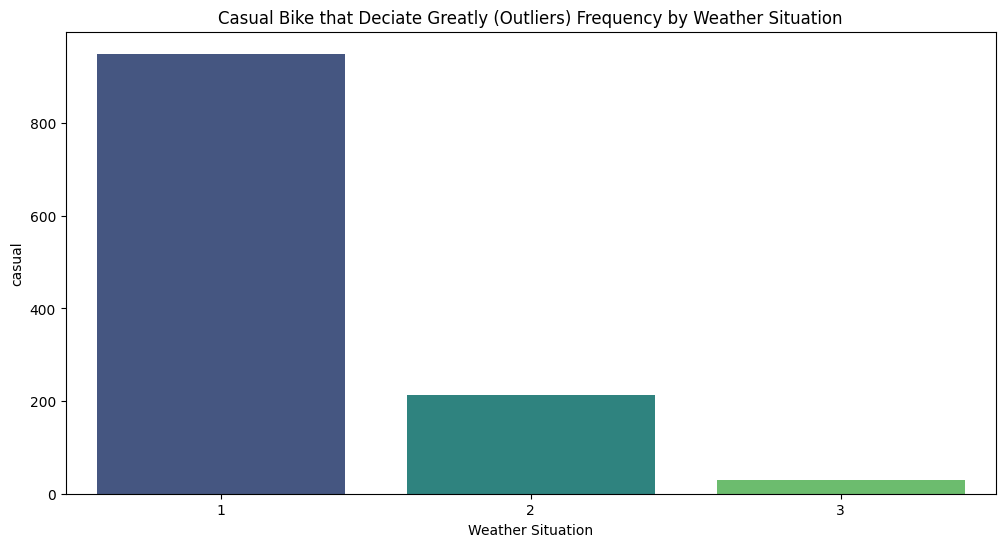

In [427]:
visual = outliers_df.groupby(by='weathersit').agg({
    "casual": 'count'
})

plt.figure(figsize=(12, 6))
sns.barplot(data=visual, x='weathersit', y='casual', palette='viridis')
plt.title('Casual Bike that Deciate Greatly (Outliers) Frequency by Weather Situation')
plt.xlabel('Weather Situation')
plt.show()

C:\Users\zadan\AppData\Local\Temp\ipykernel_12108\3609564966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visual, x='season', y='casual', palette='viridis')


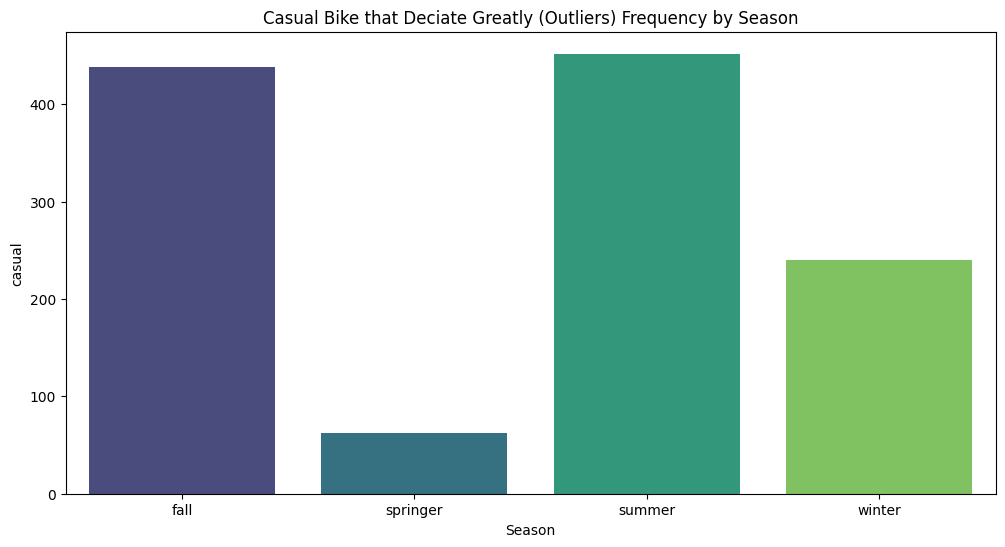

In [428]:
visual = outliers_df.groupby(by='season').agg({
    "casual": 'count'
})

plt.figure(figsize=(12, 6))
sns.barplot(data=visual, x='season', y='casual', palette='viridis')
plt.title('Casual Bike that Deciate Greatly (Outliers) Frequency by Season')
plt.xlabel('Season')
plt.show()

#### Bagaimana kondisi cuaca dapat memengaruhi peningkatan penyewaan sepeda, baik untuk pengguna casual maupun registered?

C:\Users\zadan\AppData\Local\Temp\ipykernel_12108\1882457490.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_rentals, x='weathersit', y='mean', palette='viridis')


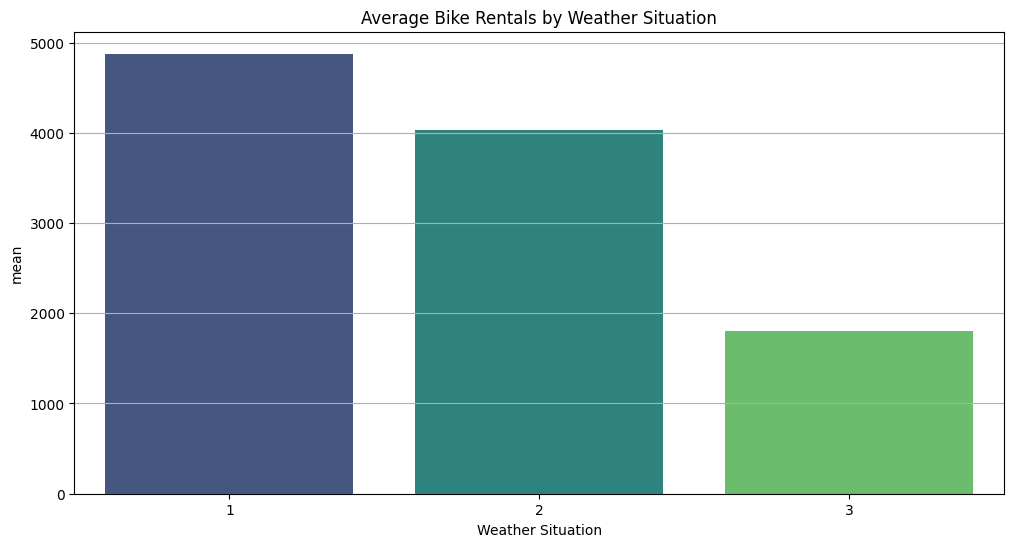

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data
weather_rentals = day_df2.groupby('weathersit')['cnt'].agg(['max', 'min', 'mean', 'std'])
weather_rentals = weather_rentals.reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_rentals, x='weathersit', y='mean', palette='viridis')
plt.title('Average Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.grid(axis='y')
plt.show()


C:\Users\zadan\AppData\Local\Temp\ipykernel_12108\2504002593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df2, x='weathersit', y='cnt', palette='coolwarm')


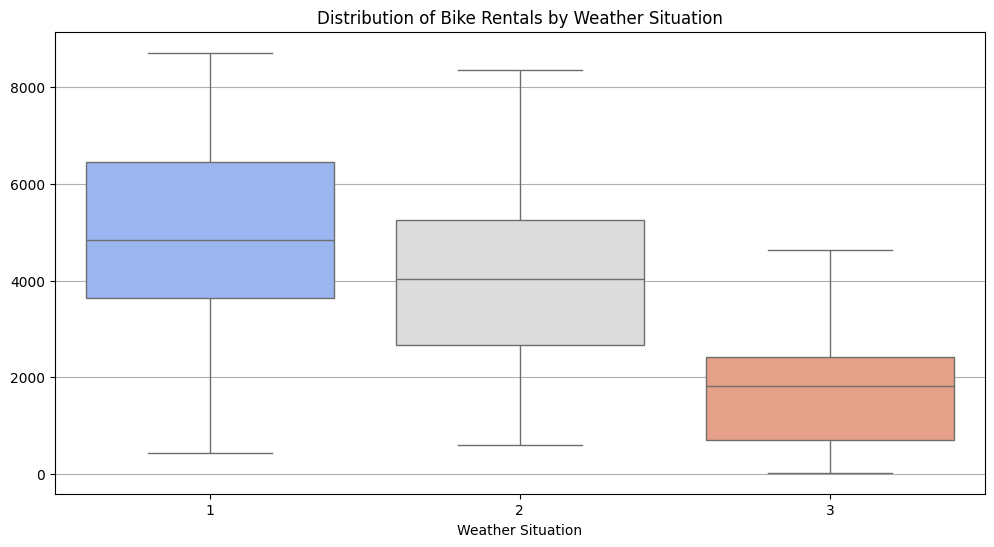

In [348]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df2, x='weathersit', y='cnt', palette='coolwarm')
plt.title('Distribution of Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('')
plt.grid(axis='y')
plt.show()

## Conclusion

**Apakah terdapat korelasi antara acara lokal & kondisi cuaca dengan lonjakan penyewaan sepeda casual yang teramati dalam data outlier?**
- Unfavorable weather impact. there is little to no demand for bike rentals during severe weather conditions like (heavy rain, thunderstorms, snow, or fog). This suggests that extreme weather acts as a deterrent for casual bike rentals.
- Peak rental periods. The Highest bike rental activity occurs during the 8th, 9th, and 10th months (August, September, October) which is summer and fall. The data also shows a consistent spike starting from spring (May in 2011 and March in 2012). This seasonal trend reflects that bike rentals increase during warmer weather when outdoor activities are appealing.
- Repetitive rentals in moderate weather. in conditions where weather are (light snow, light rain, scattered clouds), there is noticable repetition of renting a bike, contributing to 65% of the total rentals compared to clear weather conditions. This suggest that while not ideal, (light snow, light rain, scattered clouds) weather conditions are still acceptable for a significant portion.

**Bagaimana kondisi cuaca dapat memengaruhi peningkatan penyewaan sepeda, baik untuk pengguna casual maupun registered?**
- The increase in casual bike rentals tends to begin in the spring, with a noticeable spike starting in May 2011 and March 2012, suggesting that warmer and more comfortable spring weather boosts casual bike rentals.
- Casual bike rentals are highest during clear weather, with conditions such as "Clear," "Few clouds," "Partly Cloudy" being most favorable for biking.
- On the other hand, weather such as “Light Snow,” “Light Rain + Thunderstorm,” or even “Scattered clouds” can considerably dampen casual bike rental demands. Particularly in the months of March and October of 2011 and 2012, the demand for casual rental bicycles was zero under such weather conditions.

In [349]:
# day_df2.to_csv('day_clean.csv', index=False)
# hour_df2.to_csv('hour_clean.csv', index=False)